In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import pickle
import csv

from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from PIL import Image

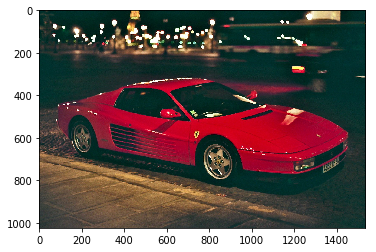

In [2]:
base_path = '/Users/Cereza/Desktop/UNTITLED'
image = Image.open(base_path + '/TRAIN/Ferrari Testarossa/x_a66dec1e34.jpg.pagespeed.ic.Zk3IV9qp8H.jpg')
imgplot = plt.imshow(image)
plt.show()

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
from keras import backend as K

Using TensorFlow backend.


In [46]:
K.set_learning_phase(1)
img_width, img_height = 224, 224
nb_train_samples = 379
nb_validation_samples = 106
epochs = 10
batch_size = 32
n_classes = 2

In [47]:
train_data_dir = base_path + '/TRAIN'
validation_data_dir = base_path + '/TEST'

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    #fill_mode = 'constant',
    #cval = 1,
    rotation_range = 5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 379 images belonging to 2 classes.
Found 106 images belonging to 2 classes.


In [48]:
def build_model():
    base_model = densenet.DenseNet121(input_shape=(img_width, img_height, 3),
                                     weights= '/Users/Cereza/Downloads/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                     include_top=False,
                                     pooling='avg')
    for layer in base_model.layers:
      layer.trainable = True

    x = base_model.output
    x = Dense(128, activation='sigmoid')(x)
    x = Activation('relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model

In [49]:
model = build_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'mse'])

In [ ]:
model_history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=callbacks_list)

Epoch 1/10
11/11 [==============================] - 760s 69s/step - loss: 0.2270 - acc: 0.9091 - mean_squared_error: 0.0704 - val_loss: 0.0633 - val_acc: 0.9896 - val_mean_squared_error: 0.0141
Epoch 2/10
11/11 [==============================] - 468s 43s/step - loss: 0.1168 - acc: 0.9687 - mean_squared_error: 0.0280 - val_loss: 0.0563 - val_acc: 0.9595 - val_mean_squared_error: 0.0170
Epoch 3/10
11/11 [==============================] - 462s 42s/step - loss: 0.1031 - acc: 0.9621 - mean_squared_error: 0.0297 - val_loss: 0.0258 - val_acc: 1.0000 - val_mean_squared_error: 0.0043
Epoch 4/10
11/11 [==============================] - 448s 41s/step - loss: 0.0974 - acc: 0.9644 - mean_squared_error: 0.0293 - val_loss: 0.0388 - val_acc: 0.9730 - val_mean_squared_error: 0.0090
Epoch 5/10
11/11 [==============================] - 421s 38s/step - loss: 0.0951 - acc: 0.9630 - mean_squared_error: 0.0262 - val_loss: 0.1228 - val_acc: 0.9479 - val_mean_squared_error: 0.0365
Epoch 6/10
11/11 [============

In [27]:
from keras.models import load_model
resume_model = load_model('CarsCNN2Weights.h5')
model_history = resume_model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=callbacks_list)

KeyboardInterrupt: 

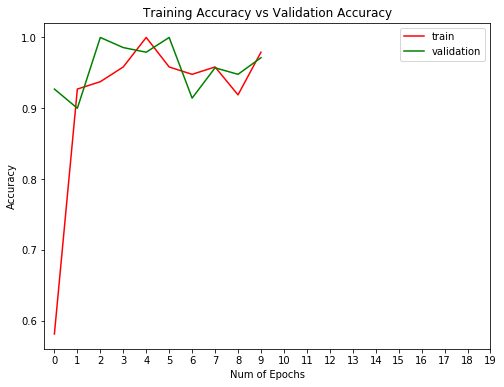

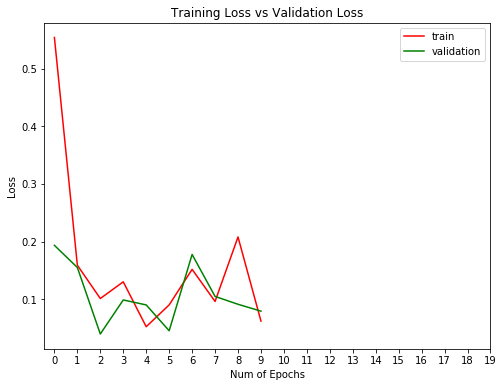

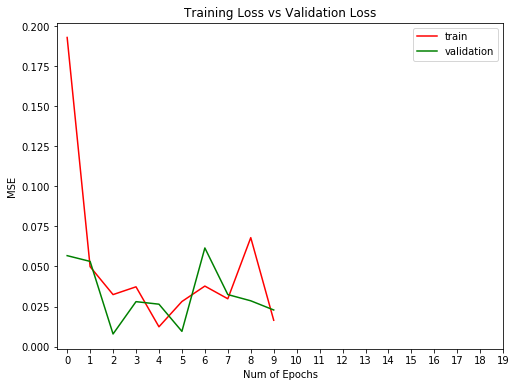

In [35]:
plt.figure(0)
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

/Users/Cereza/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


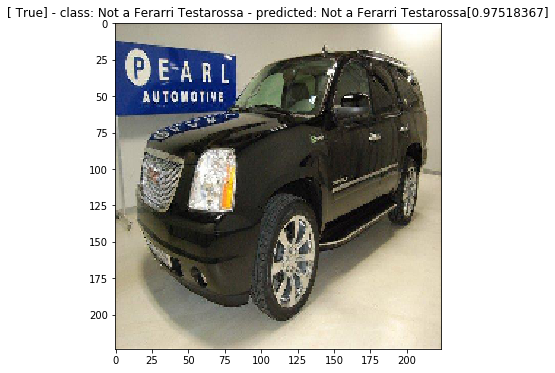

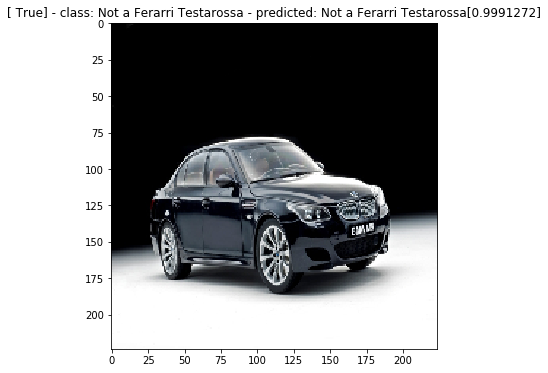

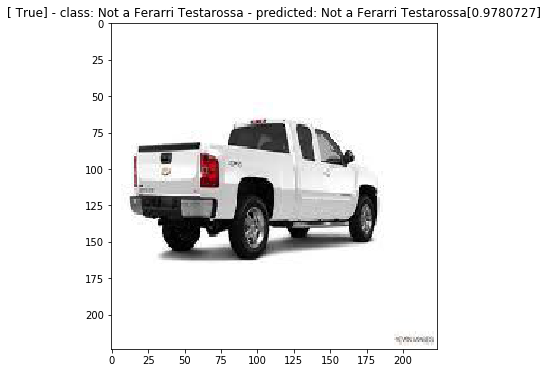

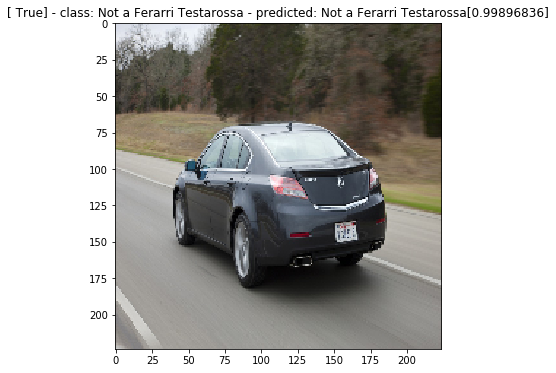

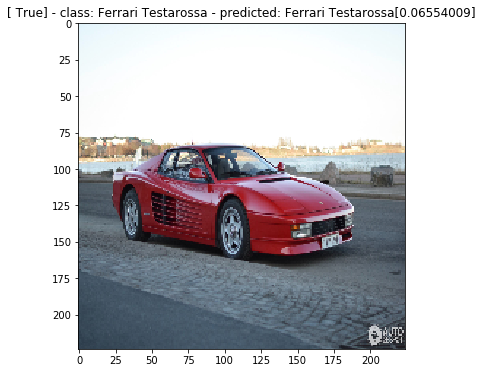

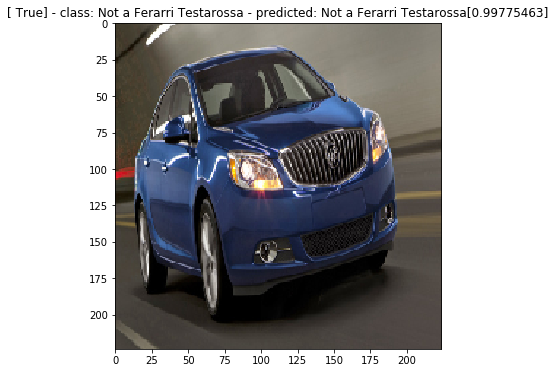

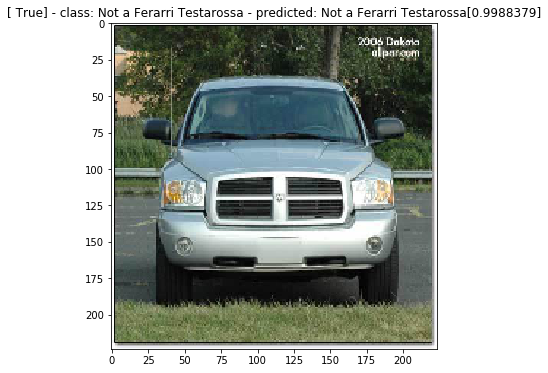

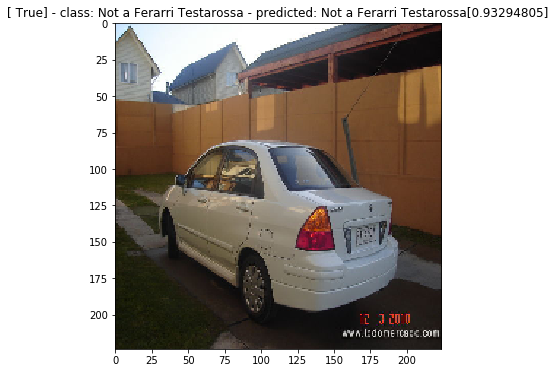

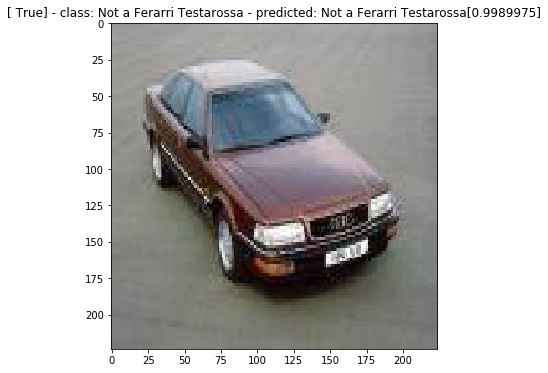

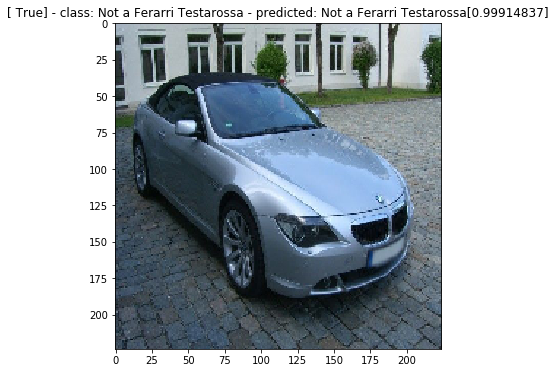

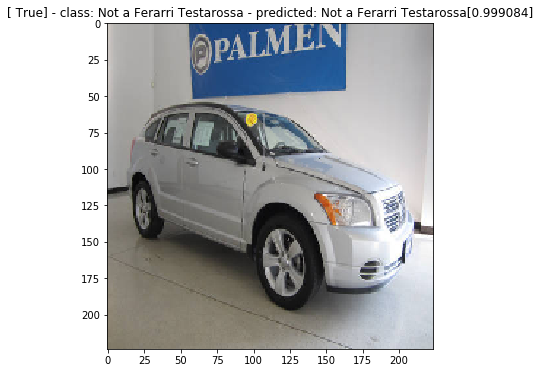

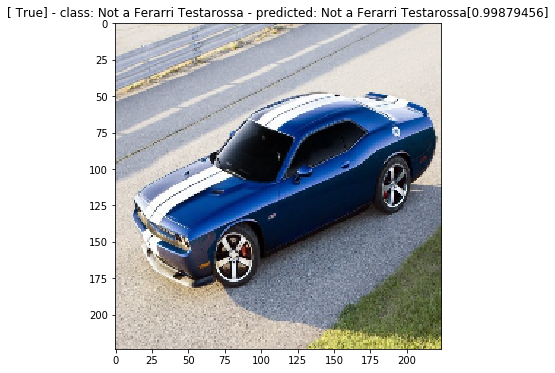

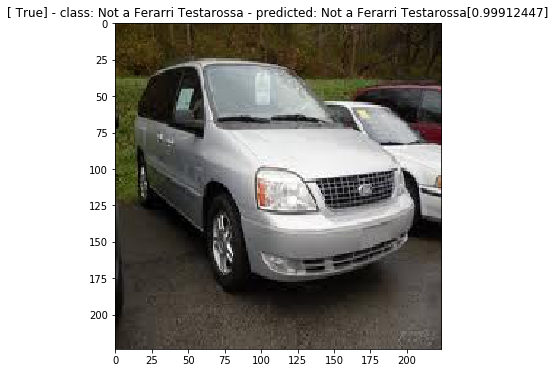

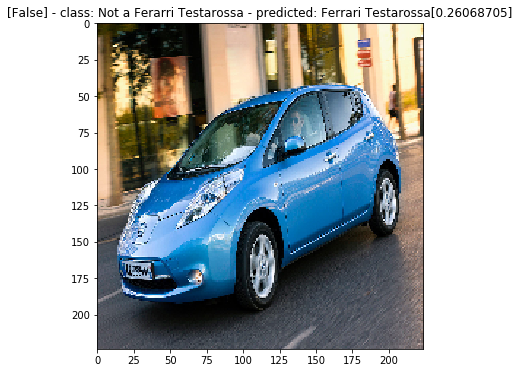

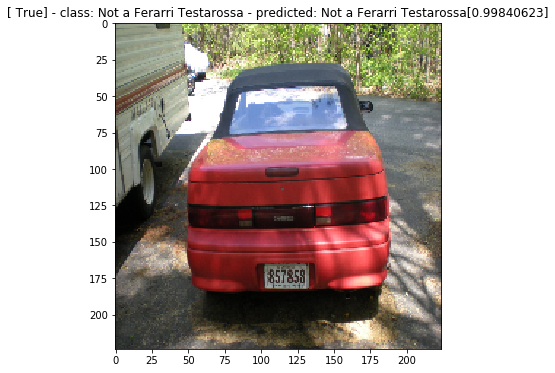

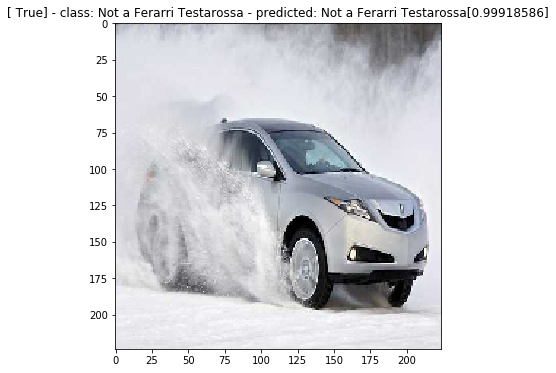

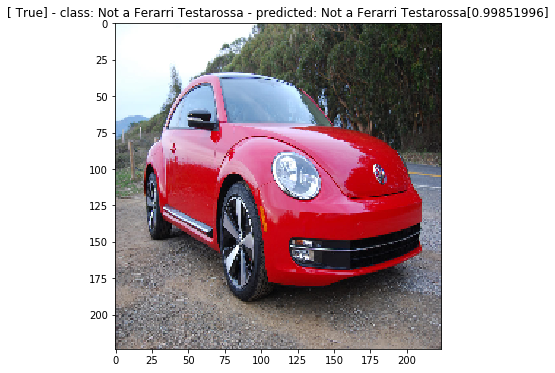

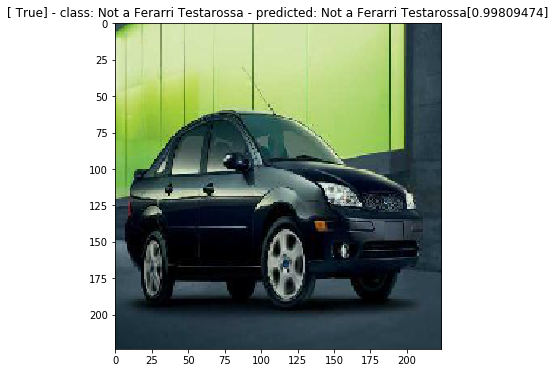

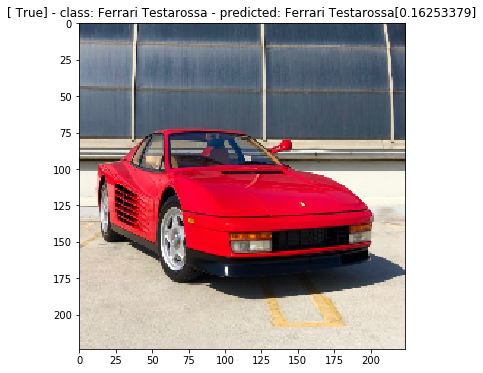

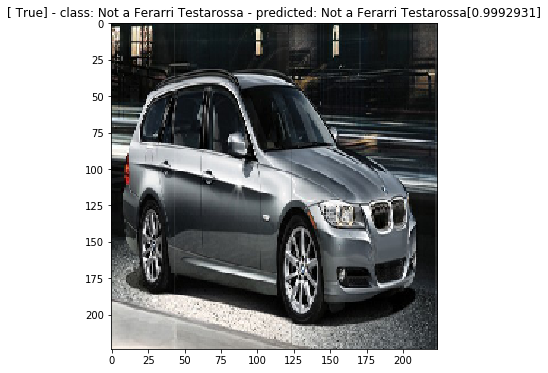

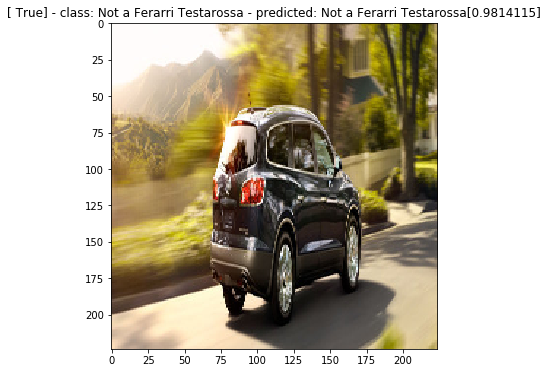

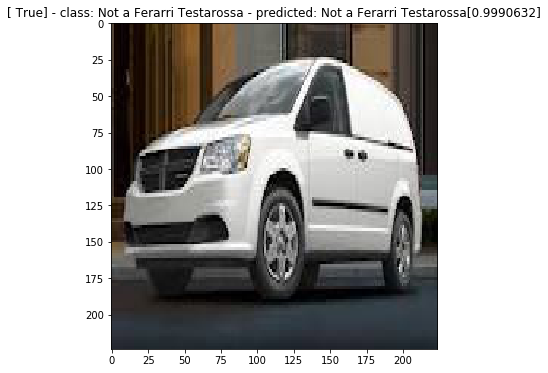

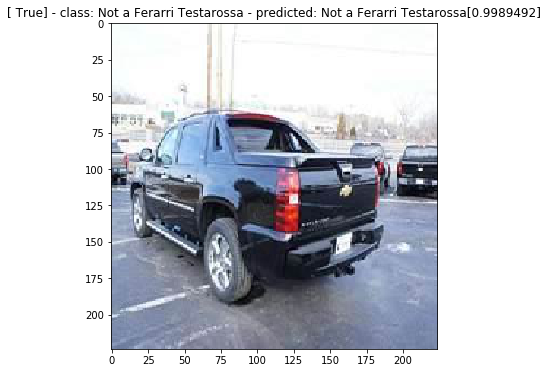

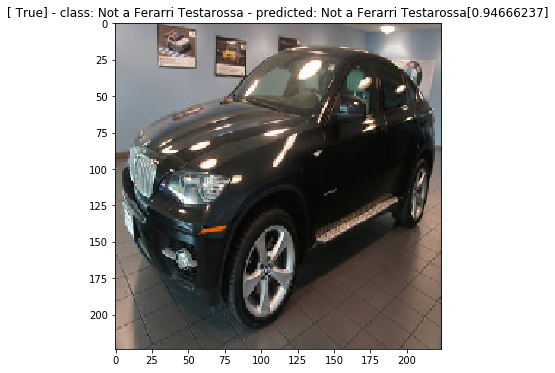

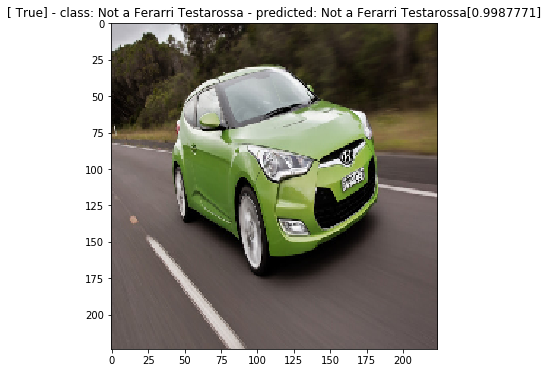

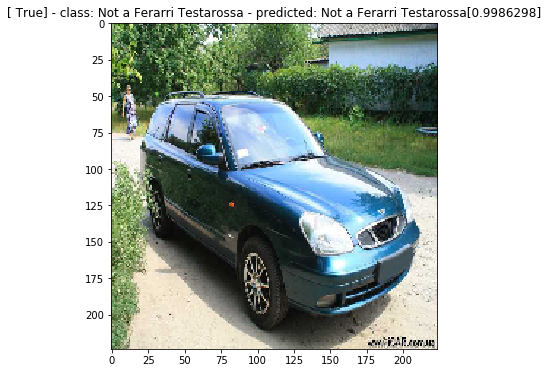

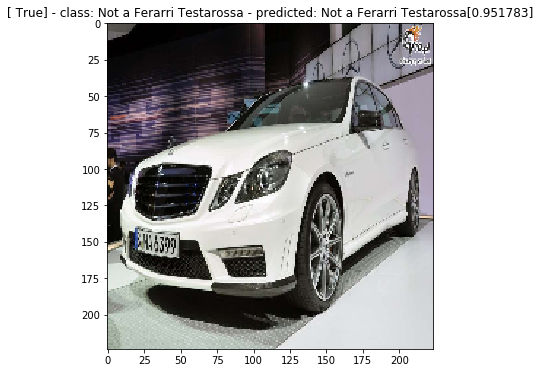

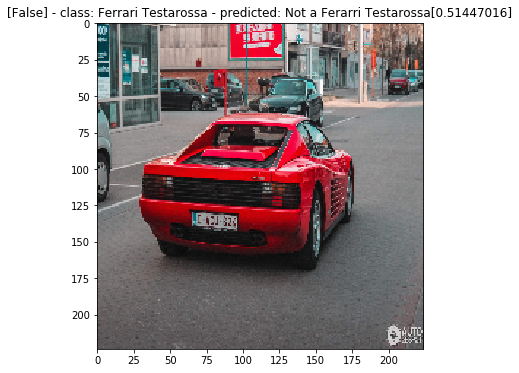

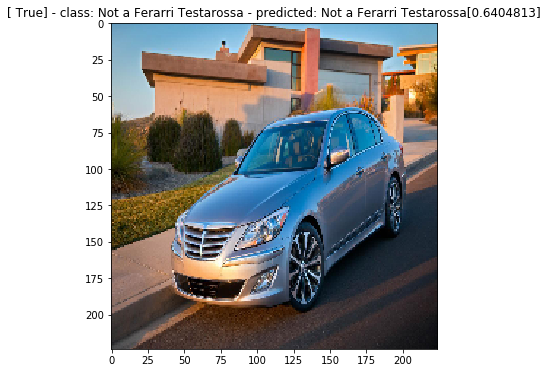

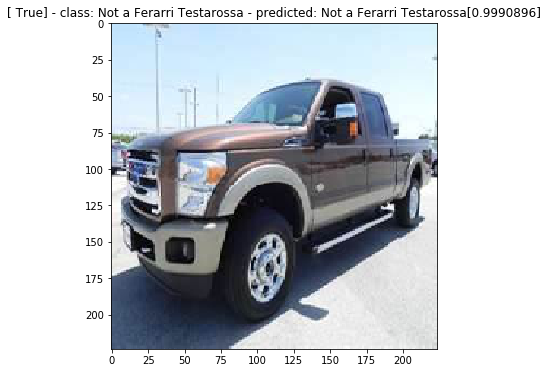

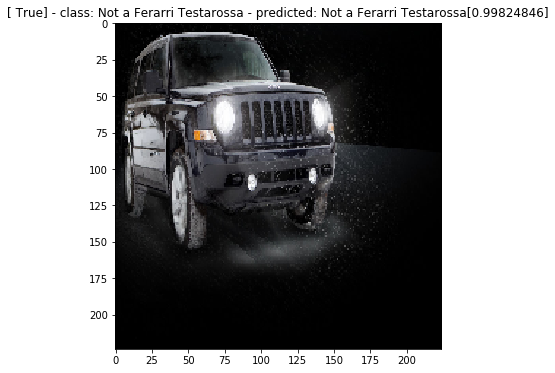

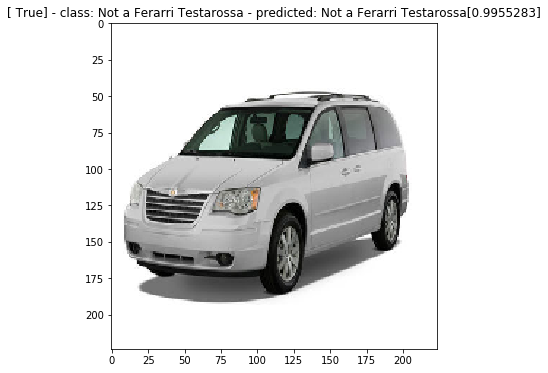

In [44]:
classes = ['Ferrari Testarossa','Not a Ferarri Testarossa']
def predict_one(model):
    image_batch, classes_batch = next(validation_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
      image = image_batch[k]
      pred = predicted_batch[k]
      the_pred = np.round(pred)
      predicted = classes[int(the_pred)]
      val_pred = max(pred)
      the_class = int(classes_batch[k])
      value = classes[int(classes_batch[k])]
      plt.figure(k)
      isTrue = (the_pred == the_class)
      plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image)

predict_one(model)